# Homework 5: Mini-project


Task Description: You are working for a non-profit that is recruiting student volunteers to help with Alzheimer’s patients. You have been tasked with predicting how suitable a person is for this task by predicting how empathetic he or she is.

We make use of the Young People	Survey dataset, please find the link to the dataset below:
https://www.kaggle.com/miroslavsabo/young-people-survey/

Predict a person’s “empathy” on a scale from 1 to 5.

# Part 1: Cleaning the data


Imports:

In [30]:
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Here, we'll clean up the data firstly in order to remove unnecessary values.


For replacing NAN values we simply find the NAN values and replace them by the column mean:

In [42]:
dataset = pandas.read_csv('responses.csv')

#fill up with median
dataset = dataset.fillna(dataset.median(axis=0))

Now we drop the columns which don't have numeric values since these columns will be of no use to predict the numeric value for Empathy

Also we drop the Empathy column since we have to predict Empathy by making use of columns other than Empathy

Now, we assign X and Y to their respective values, here X has all the columns except for the one's mentioned in the bracket

Y has empathy in it

In [43]:
X = dataset.drop(['Empathy','Punctuality','Alcohol','Smoking', 'Lying', 'Internet usage', 'Gender','Left - right handed','Education','Only child','Village - town','House - block of flats'], axis=1)
Y = dataset[['Empathy']]

# Part 2: Selecting the best features to predict Empathy

Here, we select the best features in order to predict Empathy by using Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute. Below we use RFE with the logistic regression algorithm to select the top 10 features.


You can further change the values of the number of attributes(10 in this case) being used for predicition and find out how changing the number of attributes affects the accuracy of the model

In [57]:
model = LogisticRegression()
rfe = RFE(model, 41)
fit = rfe.fit(X, Y)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

Num Features: 41
Selected Features: [ True  True  True False False False False False False False False False
 False False  True  True False False False  True  True False  True False
 False False False False  True False False False  True False False  True
  True False False  True False False False False  True False False False
 False False False False False False False  True False False  True False
 False False False False False False False False False False False False
  True False False  True False False  True False  True False False  True
 False  True False False False  True  True False False  True  True False
 False False False  True False  True False False False False False  True
 False  True False  True  True False False  True False  True  True False
 False  True False False False  True False  True False False  True False
 False  True False False False  True]
Feature Ranking: [ 1  1  1 41 50 59 21  5 88 64 90 28  7 73  1  1 14 70 16  1  1 65  1 81
 47 34 56 62  1  6 39 94  1 75 37

Append the index of the top 10 elements by checking the columns ranked 1st which can be found using the fit.ranking_ call 

In [45]:
#Find the index of the columns that are ranked 1
count = 0
val_index = []
for x in np.nditer(fit.ranking_):
    if(x==1):
        val_index.append(count)
    count+=1

#Add the column names to the list    
pos = 0
top_feat = []
for i,k in enumerate(X):
    if(i==val_index[pos]):
        top_feat.append(k)
        if(pos == len(val_index)-1):
            break
        pos+=1

You can check the top 41 attributes found using RFE below:

In [46]:
print(top_feat)

['Music', 'Slow songs or fast songs', 'Dance', 'Rock n roll', 'Alternative', 'Movies', 'Horror', 'Comedy', 'Documentary', 'Psychology', 'Physics', 'Internet', 'Biology', 'Medicine', 'Gardening', 'Science and technology', 'Fear of public speaking', 'Prioritising workload', 'Thinking ahead', 'Reliability', 'Friends versus money', 'Fake', 'Self-criticism', 'Judgment calls', 'Giving', 'Compassion to animals', 'Changing the past', 'Dreams', 'Appearence and gestures', 'Achievements', 'Children', 'Assertiveness', 'Public speaking', 'Life struggles', 'Happiness in life', 'Personality', "Parents' advice", 'Finances', 'Entertainment spending', 'Spending on healthy eating', 'Number of siblings']


# Part 3: Using cross validation to compare a few models

The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way. The following algorithms are evaluated:
1.LogisticRegression
2.LinearDiscriminantAnalysis
3.KNeighborsClassifier
4.DecisionTreeClassifier
5.GaussianNB
6.SVC
7.Ensemble

Below I have plotted the box and whisker plots to compare the models

LR: 0.399010 (0.038614)
LDA: 0.405941 (0.028004)
KNN: 0.285149 (0.025359)
CART: 0.321782 (0.064963)
NB: 0.384158 (0.038550)
SVM: 0.406931 (0.079140)
Ensemble: 0.391089 (0.040157)


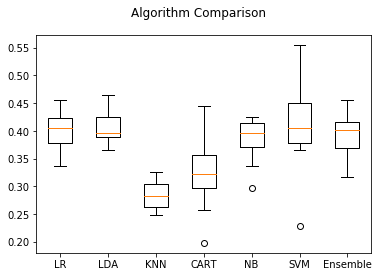

In [55]:
import warnings
warnings.simplefilter("ignore")
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
models.append(('Ensemble', ensemble))

seed = 7
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Part 4: Using SVC which is giving the best cross validation score

In [56]:
model = SVC()
model = model.fit(X_train, Y_train)
predictions=model.predict(X_test)
print(model.score(X_test, Y_test))

0.4505928853754941
